In [ ]:
import shutil
import os

def copy_directory(src, dest):
    try:
        # Kiểm tra nếu thư mục đích tồn tại, nếu không thì tạo mới
        if not os.path.exists(dest):
            os.makedirs(dest)

        # Sao chép toàn bộ nội dung thư mục src sang thư mục dest
        shutil.copytree(src, dest, dirs_exist_ok=True)
        print(f"Đã sao chép thư mục từ {src} sang {dest}")
    except Exception as e:
        print(f"Đã xảy ra lỗi: {e}")

# Đường dẫn thư mục nguồn và đích
source_directory = '/content/drive/MyDrive/ML/data'
destination_directory = '/content/'

# Gọi hàm để sao chép thư mục
copy_directory(source_directory, destination_directory)

Đã sao chép thư mục từ /content/drive/MyDrive/ML/data sang /content/


In [ ]:
import shutil
import os

def move_images(src, dest):


    for sr in src:
        filename = os.path.basename(sr)
        # Đường dẫn đầy đủ của thư mục đích
        dest_path = os.path.join(dest, filename)
        src_path = os.path.join('/content/aug', filename)
        shutil.move(src_path, dest_path)


destination_folder = '/content/data/train_dir/nv'

move_images(train_paths, destination_folder)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from scipy.stats import ks_2samp

def get_file_paths(directory):
    """
    Lấy danh sách đường dẫn đầy đủ của các tệp trong thư mục.

    :param directory: Đường dẫn tới thư mục
    :return: Danh sách các đường dẫn đầy đủ của các tệp trong thư mục
    """
    file_paths = []
    for file_name in os.listdir(directory):
        full_path = os.path.join(directory, file_name)
        if os.path.isfile(full_path):
            file_paths.append(full_path)
    return file_paths
def extract_features(img_paths, model):
    features = []
    ind = 0
    for img_path in img_paths:
        if ind%100 == 0:
            print(ind)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        feature = model.predict(img_array, verbose=0)
        features.append(feature.flatten())
        ind += 1
    return np.array(features)

# Bước 2: Giảm chiều đặc trưng bằng PCA
def reduce_dimensions(features, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    return reduced_features

def cluster_features(features, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features)
    return clusters

def stratified_split(img_paths, features, clusters, test_size=0.2):
    train_paths, valid_paths, train_features, valid_features = train_test_split(
        img_paths, features, test_size=test_size, stratify=clusters, random_state=42
    )
    return train_paths, valid_paths, train_features, valid_features

model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')
source_directory = '/content/aug'
destination_directory = '/content/databk/val_dir/nv'
img_paths_s = get_file_paths(source_directory)
img_paths_d = get_file_paths(destination_directory)

# Trích xuất đặc trưng từ ảnh
features_s = extract_features(img_paths_s, model)
features_d = extract_features(img_paths_d, model)
def compare_distributions(train_features, valid_features):
    # Compute KS test for each feature dimension
    ks_statistics = []
    p_values = []

    for i in range(train_features.shape[1]):
        ks_stat, ks_p_value = ks_2samp(train_features[:, i], valid_features[:, i])
        ks_statistics.append(ks_stat)
        p_values.append(ks_p_value)

    # Plot KS statistics
    plt.figure(figsize=(12, 6))
    plt.plot(ks_statistics, label='KS Statistic')
    plt.xlabel('Feature Dimension')
    plt.ylabel('KS Statistic')
    plt.title('Kolmogorov-Smirnov Test Statistics per Feature Dimension')
    plt.legend()
    plt.show()

    # Plot P-values
    plt.figure(figsize=(12, 6))
    plt.plot(p_values, label='P-Value')
    plt.xlabel('Feature Dimension')
    plt.ylabel('P-Value')
    plt.title('P-Values from Kolmogorov-Smirnov Test per Feature Dimension')
    plt.legend()
    plt.show()

    print(f"Average KS Statistic: {np.mean(ks_statistics)}")
    print(f"Average P-Value: {np.mean(p_values)}")

compare_distributions( features_s,features_d)

In [ ]:
features = np.concatenate((features_s, features_d), axis=0)
img_paths = np.concatenate((img_paths_s, img_paths_d), axis=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


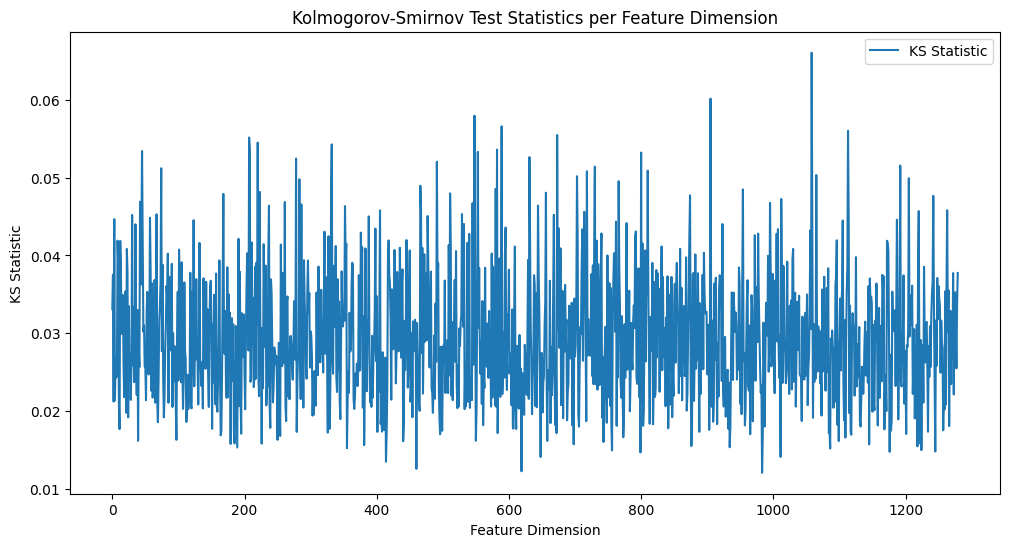

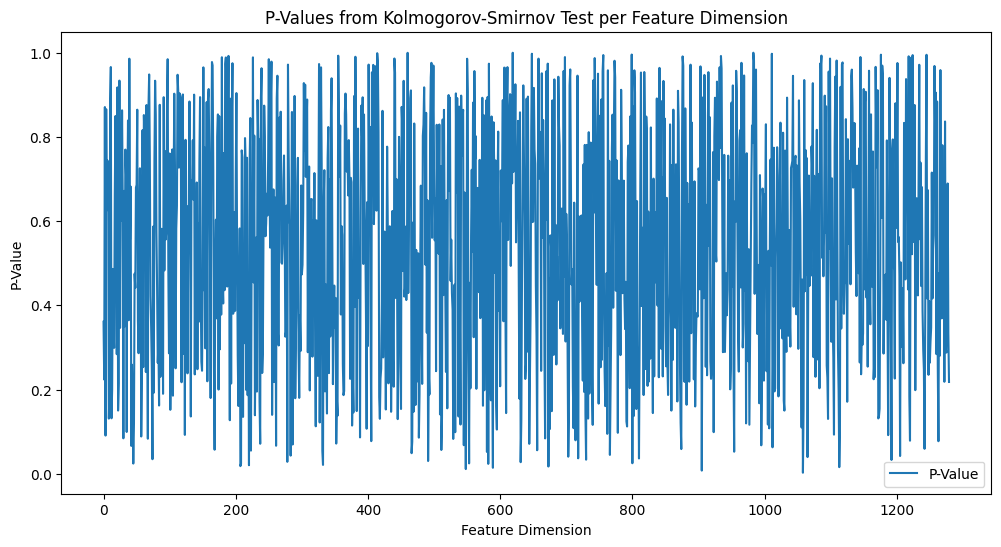

Average KS Statistic: 0.02942738267947189
Average P-Value: 0.5454400686877839


In [ ]:

# Giảm chiều đặc trưng
reduced_features = reduce_dimensions(features, n_components=5)

# Phân tầng dữ liệu bằng KMeans
clusters = cluster_features(reduced_features, n_clusters=4)

# Chia tách dữ liệu
train_paths, valid_paths, features_train, features_valid = stratified_split(img_paths, features, clusters, test_size=0.1317)
compare_distributions( features_train,features_valid)


In [ ]:
valid_paths[:10]

array(['/content/databk/train_dir/nv/ISIC_0030873.jpg',
       '/content/databk/train_dir/nv/ISIC_0026144.jpg',
       '/content/databk/train_dir/nv/ISIC_0027183.jpg',
       '/content/databk/train_dir/nv/ISIC_0033585.jpg',
       '/content/databk/train_dir/nv/ISIC_0032435.jpg',
       '/content/databk/train_dir/nv/ISIC_0024827.jpg',
       '/content/databk/train_dir/nv/ISIC_0033489.jpg',
       '/content/databk/train_dir/nv/ISIC_0024712.jpg',
       '/content/databk/train_dir/nv/ISIC_0032221.jpg',
       '/content/databk/train_dir/nv/ISIC_0025436.jpg'], dtype='<U45')

In [ ]:
import zipfile
import os

# Đường dẫn tới file zip (thay 'your_file.zip' bằng tên file của bạn)
zip_file_path = '/content/output.zip'

# Tạo thư mục để giải nén
extract_folder = '/content/databk'
os.makedirs(extract_folder, exist_ok=True)

# Giải nén file zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Files have been extracted to: {extract_folder}")

Files have been extracted to: /content/databk


In [ ]:
# prompt: bayes_opt install

!pip install bayesian-optimization


In [ ]:
import random
random.seed = 42

import seaborn as sns
import pandas as pd
import numpy as np
import keras
#from keras import backend as K

import tensorflow
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy,top_k_categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

from bayes_opt import BayesianOptimization
import numpy as np
from keras.utils import get_custom_objects
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from keras.applications import EfficientNetB0,EfficientNetB7

from keras.models import Model, load_model
val_acc_global = 0.0
from keras.utils import get_custom_objects
from keras.applications.efficientnet import preprocess_input
def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)
get_custom_objects().update({"top_2_accuracy": top_2_accuracy,"top_3_accuracy": top_3_accuracy })
%matplotlib inline

In [ ]:
print(len(os.listdir('/content/data/train_dir/nv')))
print(len(os.listdir('/content/data/train_dir/mel')))
print(len(os.listdir('/content/data/train_dir/bkl')))
print(len(os.listdir('/content/data/train_dir/bcc')))
print(len(os.listdir('/content/data/train_dir/akiec')))
print(len(os.listdir('/content/data/train_dir/vasc')))
print(len(os.listdir('/content/data/train_dir/df')))

5821
5885
5855
5798
5990
5210
4330


In [ ]:
print(len(os.listdir('/content/data/val_dir/nv')))
print(len(os.listdir('/content/data/val_dir/mel')))
print(len(os.listdir('/content/data/val_dir/bkl')))
print(len(os.listdir('/content/data/val_dir/bcc')))
print(len(os.listdir('/content/data/val_dir/akiec')))
print(len(os.listdir('/content/data/val_dir/vasc')))
print(len(os.listdir('/content/data/val_dir/df')))

884
46
88
35
30
13
8


### Set Up the Generators

In [ ]:
train_path = '/content/data/train_dir'
valid_path = '/content/data/val_dir'
train_batch_size = 50
val_batch_size = 10
image_size = 224
datagen = ImageDataGenerator(
    preprocessing_function= preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=train_batch_size)

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size)

test_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=1,
                                            shuffle=False)

Found 38889 images belonging to 7 classes.
Found 1104 images belonging to 7 classes.
Found 1104 images belonging to 7 classes.


In [ ]:
num_train_samples = 10000
num_val_samples = 1100
train_steps = int(np.ceil(num_train_samples / train_batch_size))
val_steps = int(np.ceil(num_val_samples / val_batch_size))


In [ ]:
efficientnet = EfficientNetB0(weights='imagenet')

21834768/21834768 [==============================] - 0s 0us/step


In [ ]:
def build_model(a,b):
    a = int(a)
    b = int(b)
    efficientnet = EfficientNetB0(weights='imagenet')
    x = efficientnet.layers[-a].output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)                    # Adjusting dropout rate for the new Dense layer
    predictions = Dense(7, activation='softmax')(x)

    model = Model(inputs=efficientnet.input, outputs=predictions)
    for layer in efficientnet.layers[:-b]:
        layer.trainable = False

    return model

def train_and_evaluate(a, b,w0,w1,w2,w3,w4,w5,w6):
    model = build_model(a,b)

    # Compile and train the model
    filepath = "best_model.h5"
    class_weights = {
        0: w0,
        1: w1,
        2: w2,
        3: w3,
        4: w4,
        5: w5,
        6: w6
    }
    model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['categorical_accuracy',top_2_accuracy,top_3_accuracy])
    checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1,
                                 save_best_only=True, mode='max')

    reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=3,
                                  verbose=1, mode='max', min_lr=0.00001)

    callbacks_list = [checkpoint, reduce_lr]


    # Train the model
    model.fit(train_batches, steps_per_epoch=train_steps,
                        class_weight=class_weights,
                        validation_data=valid_batches,
                        validation_steps=val_steps,
                        epochs=50, verbose=1,
                        callbacks=callbacks_list)

    # Explicitly load the best model
    best_model = load_model(filepath, custom_objects={"top_2_accuracy": top_2_accuracy, "top_3_accuracy": top_3_accuracy })

    # Evaluate the best model on validation data
    _, val_acc,val_acc_2,val_acc_3 = best_model.evaluate(valid_batches, steps=val_steps)

    # Save the best model found by Bayesian Optimization if it has the highest val_acc
    if val_acc > train_and_evaluate.best_val_acc:
        best_model.save("best_model_BO.h5")
        train_and_evaluate.best_val_acc = val_acc

    return val_acc

# Initialize the best validation accuracy
train_and_evaluate.best_val_acc = 0.0

pbounds = {'a': (5, 15), 'b': (15, 50),
           'w0': (0.5, 3),
           'w1': (0.5, 3),'w2': (0.5, 3)
           ,'w3': (0.5, 3),
           'w4': (0.5, 3),
           'w5': (0.5, 3),
           'w6': (0.5, 3)

          }

optimizer = BayesianOptimization(
    f=train_and_evaluate,
    pbounds=pbounds,
    random_state=42,
)

optimizer.maximize(
    init_points=5,
    n_iter=50,
)

print("Best validation accuracy found by Bayesian Optimization:", optimizer.max)

# Load and evaluate both models
final_best_model = load_model("best_model.h5")
bo_best_model = load_model("best_model_BO.h5")

final_val_loss, final_val_acc = final_best_model.evaluate(valid_batches, steps=val_steps)
bo_val_loss, bo_val_acc = bo_best_model.evaluate(valid_batches, steps=val_steps)

print(f"Final best model accuracy: {final_val_acc}")
print(f"Best model from Bayesian Optimization accuracy: {bo_val_acc}")

if final_val_acc == bo_val_acc:
    print("The models are the same.")
else:
    print("The models are different.")

|   iter    |  target   |     a     |     b     |    w0     |    w1     |    w2     |    w3     |    w4     |    w5     |    w6     |
-------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/50
300/300 [==============================] - ETA: 0s - loss: 1.2886 - categorical_accuracy: 0.6310 - top_2_accuracy: 0.8085 - top_3_accuracy: 0.9042
Epoch 1: val_categorical_accuracy improved from -inf to 0.76545, saving model to best_model.h5
300/300 [==============================] - 50s 132ms/step - loss: 1.2886 - categorical_accuracy: 0.6310 - top_2_accuracy: 0.8085 - top_3_accuracy: 0.9042 - val_loss: 0.7110 - val_categorical_accuracy: 0.7655 - val_top_2_accuracy: 0.9145 - val_top_3_accuracy: 0.9718 - lr: 0.0100
Epoch 2/50
300/300 [==============================] - ETA: 0s - loss: 0.9082 - categorical_accuracy: 0.7251 - top_2_accuracy: 0.8900 - top_3_accuracy: 0.9536
Epoch 2: val_categorical_accuracy improved

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 56s 146ms/step - loss: 6.7171 - categorical_accuracy: 0.4653 - top_2_accuracy: 0.6573 - top_3_accuracy: 0.7817 - val_loss: 6.7954 - val_categorical_accuracy: 0.4455 - val_top_2_accuracy: 0.7673 - val_top_3_accuracy: 0.9155 - lr: 0.0100
Epoch 2/50
300/300 [==============================] - ETA: 0s - loss: 4.2423 - categorical_accuracy: 0.5797 - top_2_accuracy: 0.7713 - top_3_accuracy: 0.8812
Epoch 2: val_categorical_accuracy improved from 0.44545 to 0.80455, saving model to best_model.h5
300/300 [==============================] - 39s 131ms/step - loss: 4.2423 - categorical_accuracy: 0.5797 - top_2_accuracy: 0.7713 - top_3_accuracy: 0.8812 - val_loss: 1.8797 - val_categorical_accuracy: 0.8045 - val_top_2_accuracy: 0.8873 - val_top_3_accuracy: 0.9473 - lr: 0.0100
Epoch 3/50
300/300 [==============================] - ETA: 0s - loss: 2.6973 - categorical_accuracy: 0.6455 - top_2_accuracy: 0.8209 - top_3_accuracy: 0.9109
Epoch 3: val_categorical_acc

ValueError: Input 0 of layer "global_average_pooling2d_14" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 1152)

In [ ]:
def build_model(a,b):
    a = int(a)
    b = int(b)
    efficientnet = EfficientNetB0(weights='imagenet')
    x = efficientnet.layers[-a].output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.25)(x)                    # Adjusting dropout rate for the new Dense layer
    predictions = Dense(7, activation='softmax')(x)

    model = Model(inputs=efficientnet.input, outputs=predictions)
    for layer in efficientnet.layers[:-b]:
        layer.trainable = False

    return model

def train_and_evaluate(a, b,w0,w1,w2,w3,w4,w5,w6):
    model = build_model(a,b)

    # Compile and train the model
    filepath = "best_model.h5"
    class_weights = {
        0: w0,
        1: w1,
        2: w2,
        3: w3,
        4: w4,
        5: w5,
        6: w6
    }
    model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['categorical_accuracy',top_2_accuracy,top_3_accuracy])
    checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1,
                                 save_best_only=True, mode='max')

    reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=2,
                                  verbose=1, mode='max', min_lr=0.00001)

    callbacks_list = [checkpoint, reduce_lr]


    # Train the model
    model.fit(train_batches, steps_per_epoch=train_steps,
                        class_weight=class_weights,
                        validation_data=valid_batches,
                        validation_steps=val_steps,
                        epochs=35, verbose=1,
                        callbacks=callbacks_list)

    # Explicitly load the best model
    best_model = load_model(filepath, custom_objects={"top_2_accuracy": top_2_accuracy, "top_3_accuracy": top_3_accuracy })

    # Evaluate the best model on validation data
    _, val_acc,val_acc_2,val_acc_3 = best_model.evaluate(valid_batches, steps=val_steps)

    # Save the best model found by Bayesian Optimization if it has the highest val_acc
    if val_acc > train_and_evaluate.best_val_acc:
        best_model.save("best_model_BO.h5")
        train_and_evaluate.best_val_acc = val_acc

    return val_acc

# Initialize the best validation accuracy
train_and_evaluate.best_val_acc = 0.0

pbounds = {'a': (6, 15), 'b': (35, 60),
           'w0': (2, 4),
           'w1': (0.5, 3),
           'w2': (0.5, 3)
           ,'w3': (0.5, 3),
           'w4': (0.5, 3),
           'w5': (2, 4),
           'w6': (0.5, 3)

          }

optimizer = BayesianOptimization(
    f=train_and_evaluate,
    pbounds=pbounds,
    random_state=42,
)

optimizer.maximize(
    init_points=4,
    n_iter=50,
)

print("Best validation accuracy found by Bayesian Optimization:", optimizer.max)

# Load and evaluate both models
final_best_model = load_model("best_model.h5")
bo_best_model = load_model("best_model_BO.h5")

final_val_loss, final_val_acc = final_best_model.evaluate(valid_batches, steps=val_steps)
bo_val_loss, bo_val_acc = bo_best_model.evaluate(valid_batches, steps=val_steps)

print(f"Final best model accuracy: {final_val_acc}")
print(f"Best model from Bayesian Optimization accuracy: {bo_val_acc}")

if final_val_acc == bo_val_acc:
    print("The models are the same.")
else:
    print("The models are different.")

|   iter    |  target   |     a     |     b     |    w0     |    w1     |    w2     |    w3     |    w4     |    w5     |    w6     |
-------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/35
300/300 [==============================] - ETA: 0s - loss: 1.2914 - categorical_accuracy: 0.6461 - top_2_accuracy: 0.8245 - top_3_accuracy: 0.9145
Epoch 1: val_categorical_accuracy improved from -inf to 0.47000, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 51s 132ms/step - loss: 1.2914 - categorical_accuracy: 0.6461 - top_2_accuracy: 0.8245 - top_3_accuracy: 0.9145 - val_loss: 2.4424 - val_categorical_accuracy: 0.4700 - val_top_2_accuracy: 0.9100 - val_top_3_accuracy: 0.9645 - lr: 0.0100
Epoch 2/35
300/300 [==============================] - ETA: 0s - loss: 0.8927 - categorical_accuracy: 0.7439 - top_2_accuracy: 0.8985 - top_3_accuracy: 0.9642
Epoch 2: val_categorical_accuracy improved from 0.47000 to 0.83909, saving model to best_model.h5
300/300 [==============================] - 38s 127ms/step - loss: 0.8927 - categorical_accuracy: 0.7439 - top_2_accuracy: 0.8985 - top_3_accuracy: 0.9642 - val_loss: 0.4653 - val_categorical_accuracy: 0.8391 - val_top_2_accuracy: 0.9464 - val_top_3_accuracy: 0.9791 - lr: 0.0100
Epoch 3/35
300/300 [==============================] - ETA: 0s - loss: 0.7215 - categorical_accuracy: 0.7798 - top_2_accuracy: 0.9216 - top_3_accuracy: 0.9740
Epoch 3: val_categorical_acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 48s 126ms/step - loss: 1.8125 - categorical_accuracy: 0.5495 - top_2_accuracy: 0.7411 - top_3_accuracy: 0.8588 - val_loss: 0.7632 - val_categorical_accuracy: 0.7745 - val_top_2_accuracy: 0.8855 - val_top_3_accuracy: 0.9336 - lr: 0.0100
Epoch 2/35
300/300 [==============================] - ETA: 0s - loss: 1.2720 - categorical_accuracy: 0.6938 - top_2_accuracy: 0.8659 - top_3_accuracy: 0.9457
Epoch 2: val_categorical_accuracy did not improve from 0.77455
300/300 [==============================] - 36s 118ms/step - loss: 1.2720 - categorical_accuracy: 0.6938 - top_2_accuracy: 0.8659 - top_3_accuracy: 0.9457 - val_loss: 0.5891 - val_categorical_accuracy: 0.7682 - val_top_2_accuracy: 0.9191 - val_top_3_accuracy: 0.9764 - lr: 0.0100
Epoch 3/35
300/300 [==============================] - ETA: 0s - loss: 1.0527 - categorical_accuracy: 0.7427 - top_2_accuracy: 0.8963 - top_3_accuracy: 0.9628
Epoch 3: val_categorical_accuracy improved from 0.77455 to 0.84

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 48s 128ms/step - loss: 1.5100 - categorical_accuracy: 0.6345 - top_2_accuracy: 0.8178 - top_3_accuracy: 0.9115 - val_loss: 0.6026 - val_categorical_accuracy: 0.8255 - val_top_2_accuracy: 0.9282 - val_top_3_accuracy: 0.9655 - lr: 0.0100
Epoch 2/35
300/300 [==============================] - ETA: 0s - loss: 1.0827 - categorical_accuracy: 0.7316 - top_2_accuracy: 0.9001 - top_3_accuracy: 0.9616
Epoch 2: val_categorical_accuracy improved from 0.82545 to 0.85000, saving model to best_model.h5
300/300 [==============================] - 37s 122ms/step - loss: 1.0827 - categorical_accuracy: 0.7316 - top_2_accuracy: 0.9001 - top_3_accuracy: 0.9616 - val_loss: 0.5722 - val_categorical_accuracy: 0.8500 - val_top_2_accuracy: 0.9518 - val_top_3_accuracy: 0.9864 - lr: 0.0100
Epoch 3/35
300/300 [==============================] - ETA: 0s - loss: 0.9400 - categorical_accuracy: 0.7652 - top_2_accuracy: 0.9181 - top_3_accuracy: 0.9727
Epoch 3: val_categorical_acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 51s 134ms/step - loss: 2.0206 - categorical_accuracy: 0.6183 - top_2_accuracy: 0.8029 - top_3_accuracy: 0.9005 - val_loss: 0.7604 - val_categorical_accuracy: 0.7991 - val_top_2_accuracy: 0.9000 - val_top_3_accuracy: 0.9618 - lr: 0.0100
Epoch 2/35
300/300 [==============================] - ETA: 0s - loss: 1.3140 - categorical_accuracy: 0.7383 - top_2_accuracy: 0.9015 - top_3_accuracy: 0.9617
Epoch 2: val_categorical_accuracy improved from 0.79909 to 0.85455, saving model to best_model.h5
300/300 [==============================] - 39s 128ms/step - loss: 1.3140 - categorical_accuracy: 0.7383 - top_2_accuracy: 0.9015 - top_3_accuracy: 0.9617 - val_loss: 0.5064 - val_categorical_accuracy: 0.8545 - val_top_2_accuracy: 0.9291 - val_top_3_accuracy: 0.9736 - lr: 0.0100
Epoch 3/35
300/300 [==============================] - ETA: 0s - loss: 1.1311 - categorical_accuracy: 0.7772 - top_2_accuracy: 0.9249 - top_3_accuracy: 0.9752
Epoch 3: val_categorical_acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 48s 127ms/step - loss: 3.0559 - categorical_accuracy: 0.5727 - top_2_accuracy: 0.7675 - top_3_accuracy: 0.8699 - val_loss: 0.7708 - val_categorical_accuracy: 0.7500 - val_top_2_accuracy: 0.8655 - val_top_3_accuracy: 0.9327 - lr: 0.0100
Epoch 2/35
300/300 [==============================] - ETA: 0s - loss: 2.1493 - categorical_accuracy: 0.7149 - top_2_accuracy: 0.8724 - top_3_accuracy: 0.9421
Epoch 2: val_categorical_accuracy improved from 0.75000 to 0.82182, saving model to best_model.h5
300/300 [==============================] - 39s 129ms/step - loss: 2.1493 - categorical_accuracy: 0.7149 - top_2_accuracy: 0.8724 - top_3_accuracy: 0.9421 - val_loss: 0.5411 - val_categorical_accuracy: 0.8218 - val_top_2_accuracy: 0.9400 - val_top_3_accuracy: 0.9818 - lr: 0.0100
Epoch 3/35
300/300 [==============================] - ETA: 0s - loss: 1.8340 - categorical_accuracy: 0.7605 - top_2_accuracy: 0.9055 - top_3_accuracy: 0.9629
Epoch 3: val_categorical_acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 59s 149ms/step - loss: 3.0455 - categorical_accuracy: 0.5710 - top_2_accuracy: 0.7606 - top_3_accuracy: 0.8685 - val_loss: 0.5135 - val_categorical_accuracy: 0.8300 - val_top_2_accuracy: 0.9373 - val_top_3_accuracy: 0.9727 - lr: 0.0100
Epoch 2/35
300/300 [==============================] - ETA: 0s - loss: 1.2144 - categorical_accuracy: 0.7112 - top_2_accuracy: 0.8786 - top_3_accuracy: 0.9531
Epoch 2: val_categorical_accuracy improved from 0.83000 to 0.84455, saving model to best_model.h5
300/300 [==============================] - 40s 133ms/step - loss: 1.2144 - categorical_accuracy: 0.7112 - top_2_accuracy: 0.8786 - top_3_accuracy: 0.9531 - val_loss: 0.4833 - val_categorical_accuracy: 0.8445 - val_top_2_accuracy: 0.9473 - val_top_3_accuracy: 0.9736 - lr: 0.0100
Epoch 3/35
300/300 [==============================] - ETA: 0s - loss: 1.0067 - categorical_accuracy: 0.7581 - top_2_accuracy: 0.9074 - top_3_accuracy: 0.9670
Epoch 3: val_categorical_acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 52s 140ms/step - loss: 1.6497 - categorical_accuracy: 0.6057 - top_2_accuracy: 0.7959 - top_3_accuracy: 0.9011 - val_loss: 0.5596 - val_categorical_accuracy: 0.8409 - val_top_2_accuracy: 0.9327 - val_top_3_accuracy: 0.9691 - lr: 0.0100
Epoch 2/35
300/300 [==============================] - ETA: 0s - loss: 1.1350 - categorical_accuracy: 0.7170 - top_2_accuracy: 0.8825 - top_3_accuracy: 0.9507
Epoch 2: val_categorical_accuracy improved from 0.84091 to 0.85636, saving model to best_model.h5
300/300 [==============================] - 40s 133ms/step - loss: 1.1350 - categorical_accuracy: 0.7170 - top_2_accuracy: 0.8825 - top_3_accuracy: 0.9507 - val_loss: 0.4895 - val_categorical_accuracy: 0.8564 - val_top_2_accuracy: 0.9400 - val_top_3_accuracy: 0.9773 - lr: 0.0100
Epoch 3/35
300/300 [==============================] - ETA: 0s - loss: 0.9981 - categorical_accuracy: 0.7501 - top_2_accuracy: 0.8987 - top_3_accuracy: 0.9623
Epoch 3: val_categorical_acc

KeyboardInterrupt: 

# Evaluate the model using the val set

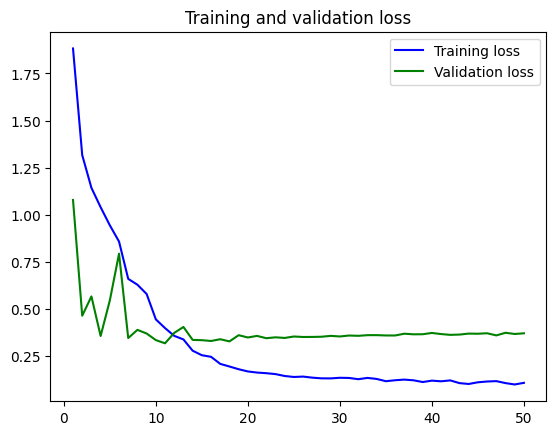

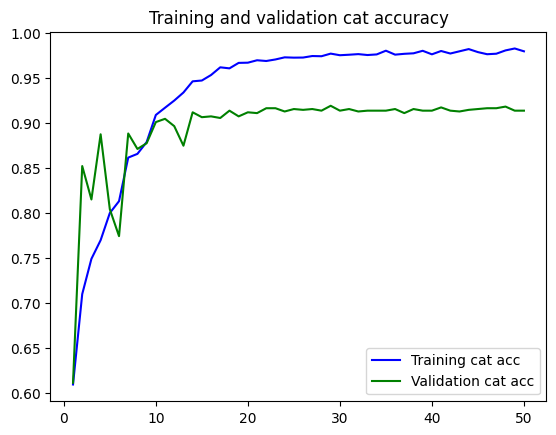

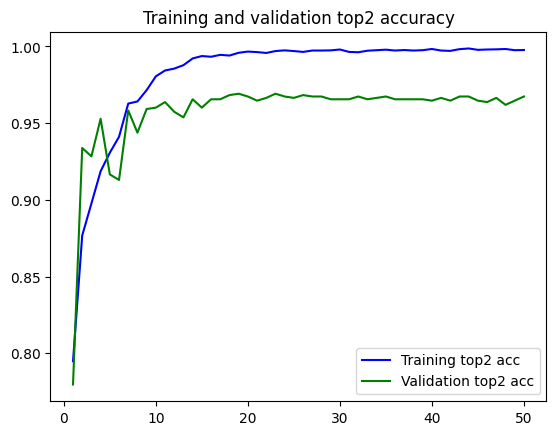

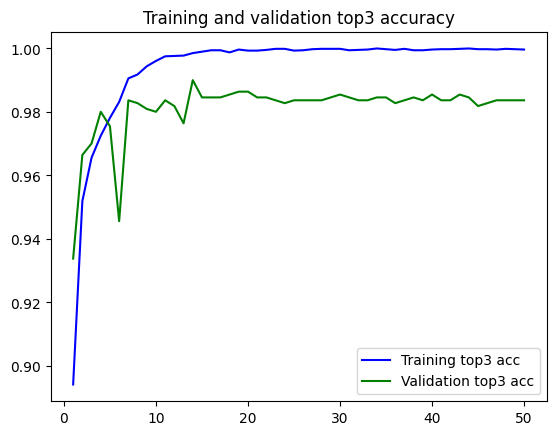

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
train_top2_acc = history.history['top_2_accuracy']
val_top2_acc = history.history['val_top_2_accuracy']
train_top3_acc = history.history['top_3_accuracy']
val_top3_acc = history.history['val_top_3_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'b', label='Training cat acc')
plt.plot(epochs, val_acc, 'g', label='Validation cat acc')
plt.title('Training and validation cat accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_top2_acc, 'b', label='Training top2 acc')
plt.plot(epochs, val_top2_acc, 'g', label='Validation top2 acc')
plt.title('Training and validation top2 accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, train_top3_acc, 'b', label='Training top3 acc')
plt.plot(epochs, val_top3_acc, 'g', label='Validation top3 acc')
plt.title('Training and validation top3 accuracy')
plt.legend()


plt.show()

### Confusion Matrix

In [ ]:
test_labels = test_batches.classes

In [ ]:
test_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
test_batches.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [ ]:
predictions = model.predict_generator(test_batches, steps=len(df_val), verbose=1)

/tmp/ipykernel_48/4245227744.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_batches, steps=len(df_val), verbose=1)


1103/1103 [==============================] - 8s 7ms/step


In [ ]:
predictions.shape

(1103, 7)

In [ ]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




In [ ]:
test_labels.shape

(1103,)

In [ ]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [ ]:
test_batches.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

Confusion matrix, without normalization
[[ 16   3   3   0   5   3   0]
 [  1  27   3   0   0   4   0]
 [  3   1  58   0   7  19   0]
 [  0   0   1   3   0   4   0]
 [  0   1   3   0  27  15   0]
 [  3   3   8   1   8 860   0]
 [  0   0   0   0   0   2  11]]


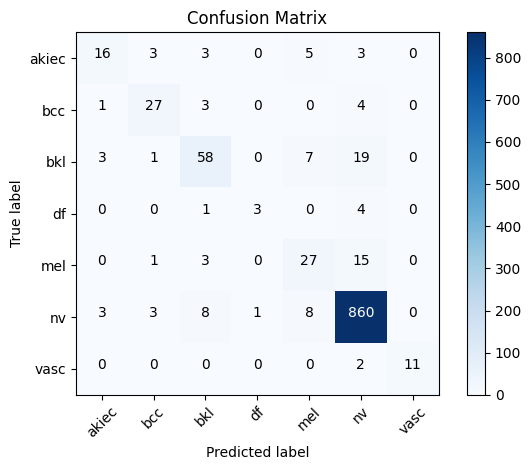

In [ ]:
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

## Generate the Classification Report

In [ ]:
y_pred = np.argmax(predictions, axis=1)

y_true = test_batches.classes

In [ ]:
from sklearn.metrics import classification_report


report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

       akiec       0.70      0.53      0.60        30
         bcc       0.77      0.77      0.77        35
         bkl       0.76      0.66      0.71        88
          df       0.75      0.38      0.50         8
         mel       0.57      0.59      0.58        46
          nv       0.95      0.97      0.96       883
        vasc       1.00      0.85      0.92        13

    accuracy                           0.91      1103
   macro avg       0.79      0.68      0.72      1103
weighted avg       0.90      0.91      0.91      1103

